In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

pd.options.display.max_rows = 15
pd.options.display.max_columns = 16

#lepši grafi:
import matplotlib
matplotlib.style.use('ggplot')

lestvica = pd.read_csv('igralci.csv', index_col='id')


# Analiza podatkov: Tenis ATP lestvica

Za začetek si oglejmo prvih nekaj zapisov v tabeli teniških igralcev uvrščenih na ATP lestvico.

In [3]:
lestvica.head(10)

,Ranking,Drzava,Ime,Starost,Turnirji
id,,,,,
1,1,GBR,Andy Murray,29,16
2,2,SRB,Novak Djokovic,29,17
3,3,CAN,Milos Raonic,26,19
4,4,SUI,Stan Wawrinka,31,21
5,5,JPN,Kei Nishikori,27,20
6,6,CRO,Marin Cilic,28,22
7,7,FRA,Gael Monfils,30,18
8,8,AUT,Dominic Thiem,23,28
9,9,ESP,Rafael Nadal,30,16


*Obrazložitev podatkov v stolpcih:*
* stolpec "Ranking" nam pove na katerem mestu na ATP lestvici se igralec nahaja
* stolpec "Turnirji" nam pove koliko turnirjev, ki prispevajo k skupnemu seštevku ATP točk, se je igralec udeležil v letošnji sezoni.


## *Analiza podatkov glede na starost igralcev*

Za začetek poglejmo kolikšna je povprečna starost tenisačev:

In [65]:
lestvica["Starost"].mean()

24.599

Poglejmo koliko starejših od 35 in mlajših od 18 let je uvrščenih v boljšo polovico igralcev:

In [68]:
lestvica[(lestvica.Starost > 35)& (lestvica.Ranking <= 500)]

,Ranking,Drzava,Ime,Starost,Turnirji,uvrstitev : turnirji
id,,,,,,
20,20,CRO,Ivo Karlovic,37,24,0.833333
54,54,FRA,Stephane Robert,36,27,2.000000
102,102,DOM,Victor Estrella Burgos,36,27,3.777778
107,107,CZE,Radek Stepanek,38,14,7.642857
148,148,ESP,Ruben Ramirez Hidalgo,38,26,5.692308
164,164,ESP,Albert Montanes,36,20,8.200000
182,182,GER,Michael Berrer,36,25,7.280000
425,425,CZE,Jan Hernych,37,11,38.636364


In [5]:
lestvica[(lestvica.Starost < 18) & (lestvica.Ranking <= 500)]

,Ranking,Drzava,Ime,Starost,Turnirji
id,,,,,
250,250,CAN,Denis Shapovalov,17,17
351,351,AUS,Alex De Minaur,17,19


Število igralcev določene starosti:

In [6]:
lestvica_starost = lestvica.groupby("Starost")

In [7]:
lestvica_starost.size()

Starost
16     3
17     9
18    34
19    71
20    83
21    69
22    80
23    89
24    91
25    70
26    97
27    66
28    52
29    54
30    30
31    33
32    17
33    17
34    13
35    11
36     6
37     2
38     2
40     1
dtype: int64

Za lažjo predstavo lahko podatke o starosti gralcev prikažemo tudi v obliki grafa:

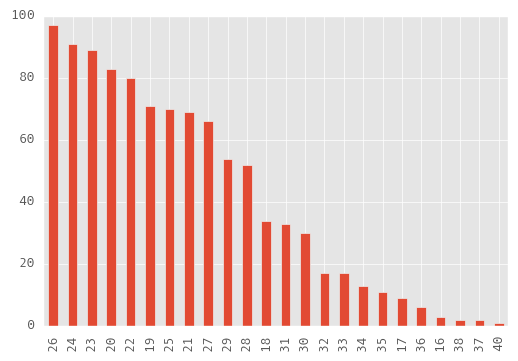

In [28]:
starost_presteta = lestvica["Starost"].value_counts()
starost_presteta.plot(kind= 'bar')

Poglejmo si povprečno uvrstitev na lestvici za določeno starost:

In [69]:
lestvica_starost['Ranking'].mean().sort_values()

Starost
38    127.500000
37    222.500000
35    252.454545
32    269.176471
33    305.588235
36    328.000000
29    342.148148
         ...    
23    576.561798
19    576.746479
20    593.746988
18    643.823529
17    731.333333
16    778.000000
40    840.000000
Name: Ranking, dtype: float64

Primerjajmo ta rezultat s povprečno starostjo prvih in zadnjih 100 igralcev na lestvici:

In [12]:
lestvica.head(100)["Starost"].mean()

28.11

In [13]:
lestvica.tail(100)["Starost"].mean()

23.2

Iz izračuna povprečne uvrstitve glede na starost bi sklepali, da je optimalna starost za doseganje dobrih rezultatov v tenisu okoli 35 let. Ta podatek očitno ne odraža realnega stanja - to nam pove že povprečje starosti prvih 100 igralcev na lestvici.

Zato se analize lotimo nekoliko drugače.

Najprej razdelimo igralce na lestvici v skupine po 50 - vsakemu igralcu bomo v tabeli dodali še indeks od 1 do 20, ki nam pove, v kateri petdeseterici na ATP lestvici se nahaja.

In [21]:
lestvica["Petdeseterica"] = ((lestvica.Ranking-1) // 50) +1
lestvica

,Ranking,Drzava,Ime,Starost,Turnirji,Petdeseterica
id,,,,,,
1,1,GBR,Andy Murray,29,16,1
2,2,SRB,Novak Djokovic,29,17,1
3,3,CAN,Milos Raonic,26,19,1
4,4,SUI,Stan Wawrinka,31,21,1
5,5,JPN,Kei Nishikori,27,20,1
6,6,CRO,Marin Cilic,28,22,1
7,7,FRA,Gael Monfils,30,18,1
...,...,...,...,...,...,...
994,994,ESP,Ricardo Villacorta-Alonso,31,11,20


Sedaj pa si oglejmo povprečne starosti za posamezne petdeseterice:

In [15]:
petdeseterice = lestvica.groupby("Petdeseterica")
petdeseterice["Starost"].mean()

Petdeseterica
1     28.62
2     27.60
3     27.56
4     25.48
5     24.54
6     25.46
7     23.96
8     25.14
9     25.34
10    23.30
11    23.52
12    24.12
13    22.90
14    24.40
15    24.24
16    22.58
17    23.04
18    23.78
19    23.72
20    22.68
Name: Starost, dtype: float64

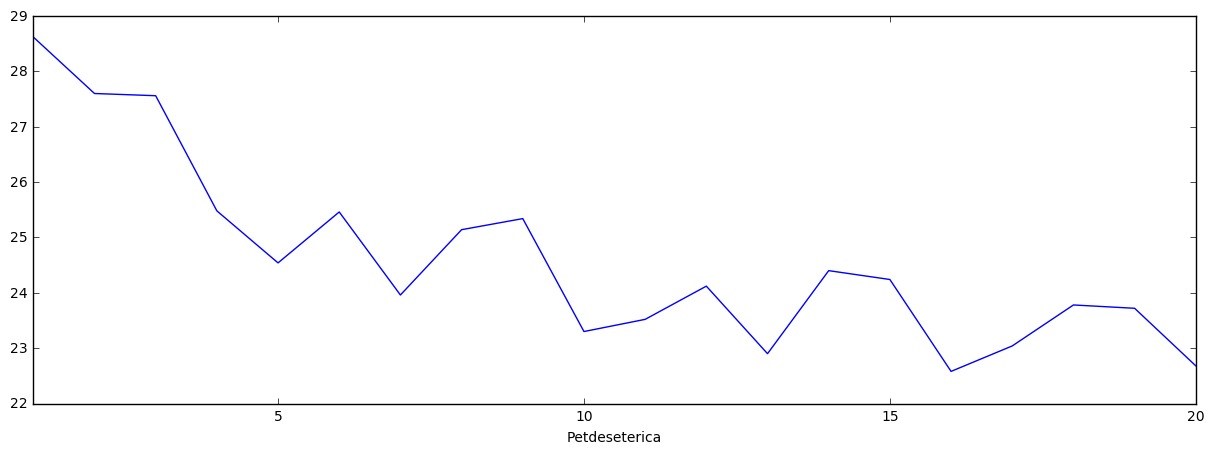

In [16]:
petdeseterice["Starost"].mean().plot()

Zgornji graf lepo prikaže, da se starost s premikom navzdol po lestvici v splošnem manjša.

## *Analiza podatkov glede na narodnost igralcev*

Za začetek preštejmo koliko držav se pojavi v tabeli in koliko igralcev prihaja iz posameznih držav:

In [17]:
len(lestvica.groupby("Drzava"))

76

In [22]:
lestvica["Drzava"].value_counts(ascending = False)

FRA    77
USA    74
ITA    68
GER    60
ESP    56
ARG    41
RUS    41
       ..
MNE     1
BAR     1
FIN     1
VIE     1
MDA     1
THA     1
HKG     1
Name: Drzava, dtype: int64

Zanimivo bi bilo vedeti, katera država je najbolj uspešna - poglejmo zastopanost med prvih 100 uvrščenih:

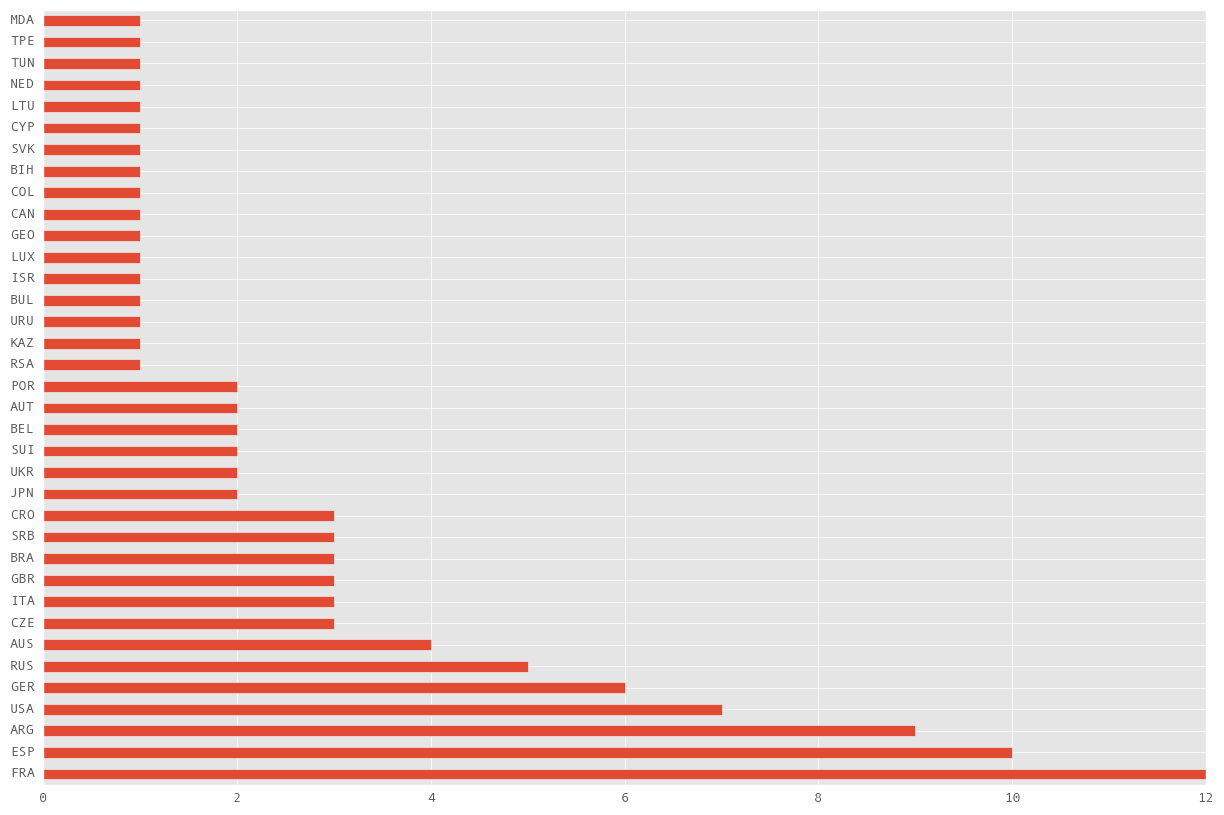

In [72]:
lestvica.head(100)["Drzava"].value_counts().plot(kind = "barh", figsize = (15,10))

Uspešnost države lahko ocenimo tudi z izračunom povprečne uvrstitve njenih tenisačev:

In [74]:
#Povprečna uvrstitev države:
lestvica_po_drzavah = lestvica.groupby("Drzava")
lestvica_po_drzavah.mean()


,Ranking,Starost,Turnirji,uvrstitev : turnirji
Drzava,,,,
ARG,393.365854,24.439024,21.560976,27.156396
AUS,455.486486,23.243243,18.081081,53.101516
AUT,514.555556,23.833333,22.722222,27.634527
BAR,152.000000,24.000000,21.000000,7.238095
BEL,436.560000,24.560000,20.960000,26.699605
BIH,310.400000,25.200000,23.200000,13.854988
BLR,444.111111,24.333333,14.666667,41.532605
...,...,...,...,...
UKR,605.722222,25.055556,21.111111,31.885303


Še boljšo oceno bomo dobili, če bomo primerjali razmerje med povprečno uvrstitvijo in številom igralcev vsake države:

In [33]:
stevilo = lestvica_po_drzavah.count()
drzave = lestvica_po_drzavah.mean()

tabela_drzav = pd.concat([stevilo["Ime"], drzave["Ranking"]], axis=1, keys = ["Število igralcev", "Povprečna uvrstitev"])
tabela_drzav

,Število igralcev,Povprečna uvrstitev
Drzava,,
ARG,41,393.365854
AUS,37,455.486486
AUT,18,514.555556
BAR,1,152.000000
BEL,25,436.560000
BIH,5,310.400000
BLR,9,444.111111
...,...,...
UKR,18,605.722222


array([<matplotlib.axes._subplots.AxesSubplot object at 0x112a246d8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1176ad4a8>], dtype=object)

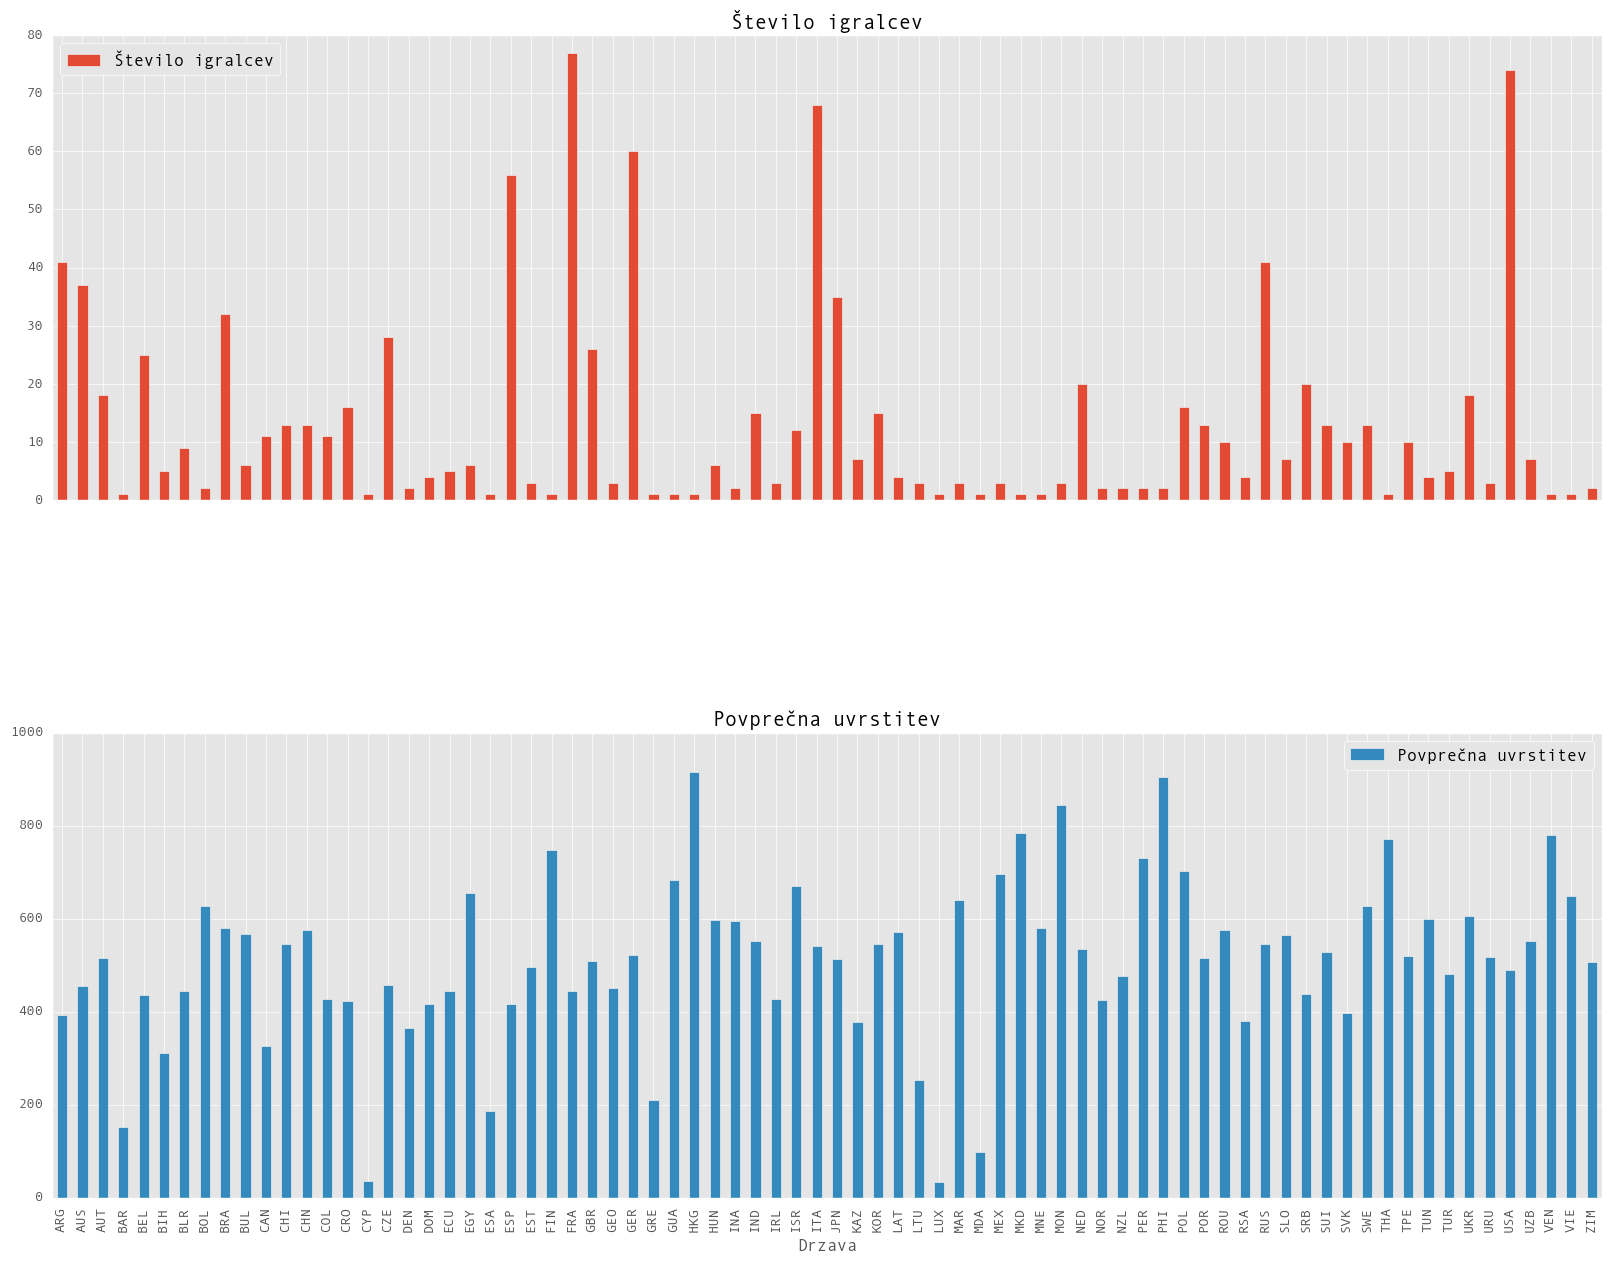

In [34]:
tabela_drzav.plot(kind="bar", subplots = True, figsize = (20,15))

Za lažjo primerjavo združimo grafa:

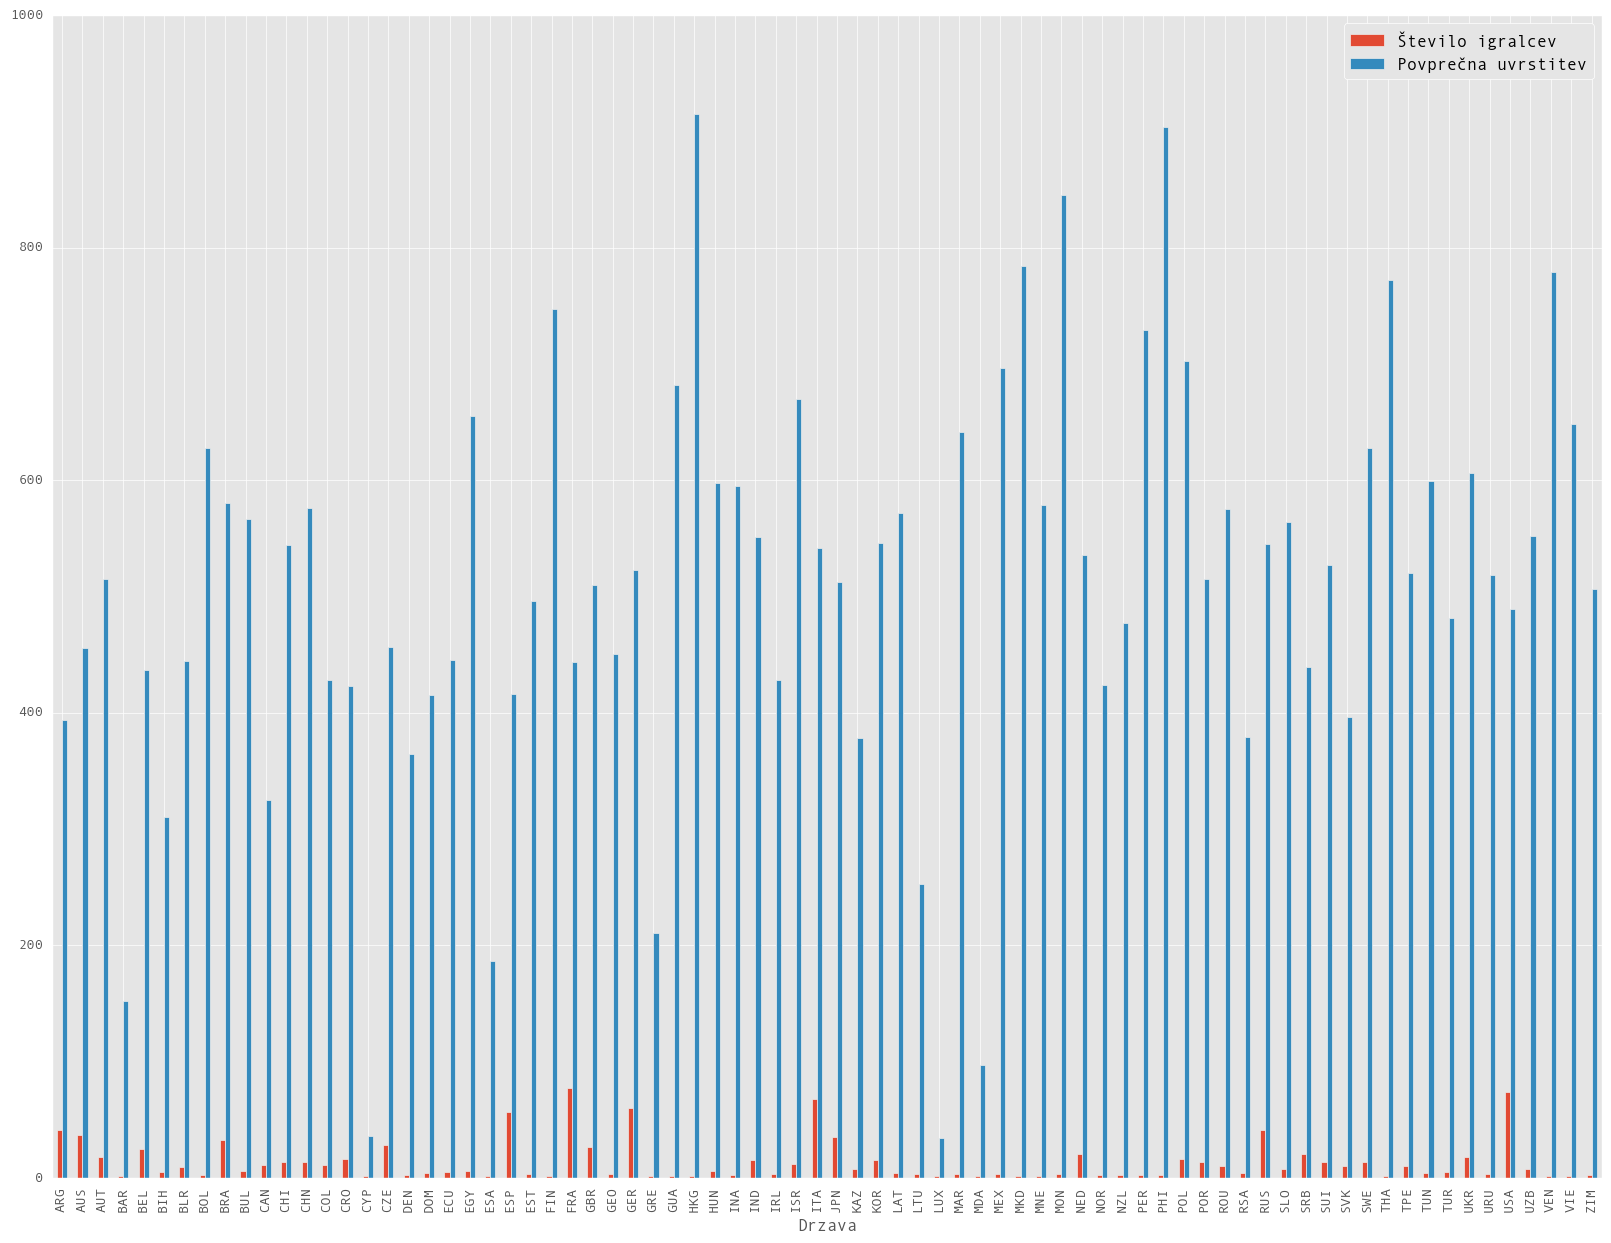

In [35]:
tabela_drzav.plot(kind="bar", figsize = (20,15))

Z zgornjega grafa lahko relativno enostavno razberemo, katera država ima najboljše razmerje med številom uvrščenih igralcev in povprečno uvrstitvijo - to bo tista država, katere velikosti modrega in vijoličnega stolpca na grafu se razlikujeta za največ.

## *Analiza podatkov glede na število odigranih turnirjev*

Poglejmo še, kateri izmed igralcev je najbolj "učinkovit", t.j. kateri izmed igralcev ima najboljše razmerje med odigranimi turnirji in uvrstitvijo na lestvici.

In [76]:
lestvica["uvrstitev : turnirji"] = 1/((lestvica.Ranking)*(lestvica.Turnirji))
lestvica

,Ranking,Drzava,Ime,Starost,Turnirji,uvrstitev : turnirji
id,,,,,,
1,1,GBR,Andy Murray,29,16,0.062500
2,2,SRB,Novak Djokovic,29,17,0.029412
3,3,CAN,Milos Raonic,26,19,0.017544
4,4,SUI,Stan Wawrinka,31,21,0.011905
5,5,JPN,Kei Nishikori,27,20,0.010000
6,6,CRO,Marin Cilic,28,22,0.007576
7,7,FRA,Gael Monfils,30,18,0.007937
...,...,...,...,...,...,...
994,994,ESP,Ricardo Villacorta-Alonso,31,11,0.000091


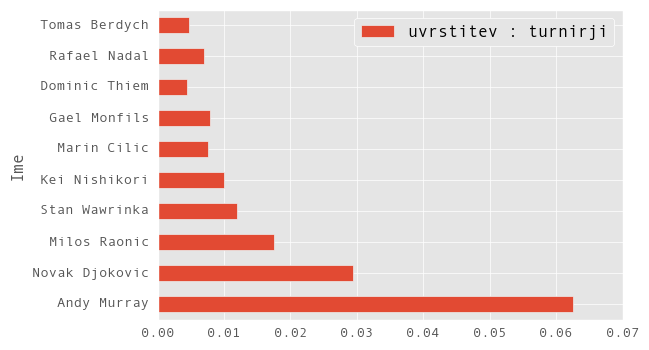

In [77]:
lestvica1 = lestvica.set_index("Ime")
lestvica2 = lestvica1.drop(lestvica1.columns[[0,1,2,3]], axis = 1)
lestvica2.head(10).plot(kind= "barh")

In [46]:
lestvica

,Ranking,Drzava,Ime,Starost,Turnirji,uvrstitev : turnirji
id,,,,,,
1,1,GBR,Andy Murray,29,16,0.062500
2,2,SRB,Novak Djokovic,29,17,0.117647
3,3,CAN,Milos Raonic,26,19,0.157895
4,4,SUI,Stan Wawrinka,31,21,0.190476
5,5,JPN,Kei Nishikori,27,20,0.250000
6,6,CRO,Marin Cilic,28,22,0.272727
7,7,FRA,Gael Monfils,30,18,0.388889
...,...,...,...,...,...,...
994,994,ESP,Ricardo Villacorta-Alonso,31,11,90.363636


Med prvimi desetimi igralci je torej najbolj učinkovit prav vodilni Andy Murray.

## Uporaba podatkov v tabeli

Za konec zapišimo še funkcijo, ki nam bo med tisočimi vrsticami v tabeli pomagala poiskati vrednosti, ki nas zanimajo:

In [62]:
def poisci_igralca(df, stolpec, vrednost):
    return df.loc[df[stolpec] == vrednost]

Pa poglejmo, če je kateri izmed slovenskih tenisačev uvrščen med prvih 100 najboljših na ATP lestvici:

In [63]:
poisci_igralca(lestvica.head(100), "Drzava", "SLO")

,Ranking,Drzava,Ime,Starost,Turnirji,uvrstitev : turnirji
id,,,,,,


Žal ne, lahko pa si pogledamo na katerih mestih *se* nahajajo naši igralci:

In [64]:
poisci_igralca(lestvica, "Drzava", "SLO")

,Ranking,Drzava,Ime,Starost,Turnirji,uvrstitev : turnirji
id,,,,,,
155,155,SLO,Grega Zemlja,30,27,5.740741
217,217,SLO,Blaz Kavcic,29,15,14.466667
255,255,SLO,Blaz Rola,26,23,11.086957
795,795,SLO,Tomislav Ternar,26,17,46.764706
818,818,SLO,Mike Urbanija,27,14,58.428571
828,828,SLO,Nik Razborsek,23,16,51.750000
879,879,SLO,Tom Kocevar-Desman,26,16,54.937500
